---

# Normalizing the Data

---

In [74]:
import pandas as pd

# Load the CSV file into a DataFrame
data = pd.read_csv('csv/data_cleaned.csv')
display(data.head())

,GlobalEventID,Date,DATEADDED,IsRootEvent,EventCode,EventBaseCode,EventRootCode,GoldsteinScale,NumMentions,AvgTone,ActionGeo_FullName,ActionGeo_Lat,ActionGeo_Long,Lag,LagCluster,Month
0,1218008600,2024-12-29,2024-12-29,1,111,111,11,-2.0,3,6.336634,"Chicago, Illinois, United States",41.85,-87.6501,0,0,12
1,1218059434,2024-12-29,2024-12-29,1,90,90,9,-2.0,10,-6.250000,"Chicago, Illinois, United States",41.85,-87.6501,0,0,12
2,1217968727,2024-12-29,2024-12-29,1,111,111,11,-2.0,4,0.806952,"Chicago, Illinois, United States",41.85,-87.6501,0,0,12
3,1218064446,2024-12-29,2024-12-29,1,90,90,9,-2.0,10,0.884956,"Chicago, Illinois, United States",41.85,-87.6501,0,0,12
4,1218009043,2024-12-29,2024-12-29,1,111,111,11,-2.0,3,6.336634,"Chicago, Illinois, United States",41.85,-87.6501,0,0,12


In [75]:
from datetime import datetime
import pandas as pd

# Calculate the difference in days between today and the dates in the 'Date' column
data['EllapsedDays'] = (datetime.now() - pd.to_datetime(data['Date'])).dt.days


In [76]:
display(data.head())

,GlobalEventID,Date,DATEADDED,IsRootEvent,EventCode,EventBaseCode,EventRootCode,GoldsteinScale,NumMentions,AvgTone,ActionGeo_FullName,ActionGeo_Lat,ActionGeo_Long,Lag,LagCluster,Month,EllapsedDays
0,1218008600,2024-12-29,2024-12-29,1,111,111,11,-2.0,3,6.336634,"Chicago, Illinois, United States",41.85,-87.6501,0,0,12,2
1,1218059434,2024-12-29,2024-12-29,1,90,90,9,-2.0,10,-6.250000,"Chicago, Illinois, United States",41.85,-87.6501,0,0,12,2
2,1217968727,2024-12-29,2024-12-29,1,111,111,11,-2.0,4,0.806952,"Chicago, Illinois, United States",41.85,-87.6501,0,0,12,2
3,1218064446,2024-12-29,2024-12-29,1,90,90,9,-2.0,10,0.884956,"Chicago, Illinois, United States",41.85,-87.6501,0,0,12,2
4,1218009043,2024-12-29,2024-12-29,1,111,111,11,-2.0,3,6.336634,"Chicago, Illinois, United States",41.85,-87.6501,0,0,12,2


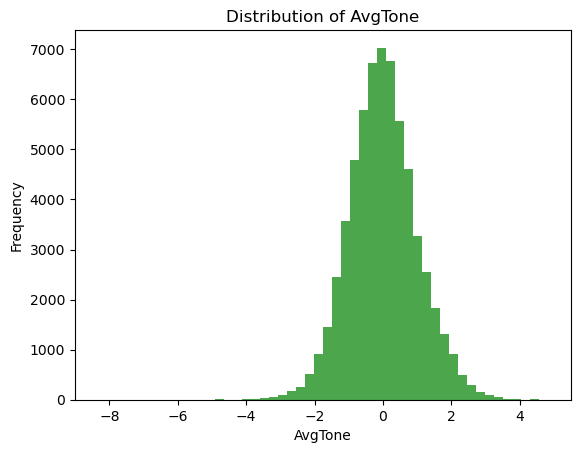

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt

# Normalize AvgTone with TensorFlow preprocessing layers
normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(data[['AvgTone']].values)  # Adapt to the data
data['AvgTone'] = normalizer(data[['AvgTone']].values)

# Create TensorFlow dataset
def create_tf_dataset(X, Y, batch_size=32, shuffle=True):
    dataset = tf.data.Dataset.from_tensor_slices((X, Y))
    if shuffle:
        dataset = dataset.shuffle(buffer_size=len(X))
    return dataset.batch(batch_size).prefetch(tf.data.AUTOTUNE)

# Convert numpy arrays X and Y to TensorFlow datasets
train_dataset = create_tf_dataset(X_train, Y_train)
test_dataset = create_tf_dataset(X_test, Y_test, shuffle=False)

# Plot the distribution of AvgTone
plt.hist(data['AvgTone'], bins=50, color='green', alpha=0.7)
plt.title('Distribution of AvgTone')
plt.xlabel('AvgTone')
plt.ylabel('Frequency')
plt.show()

In [78]:
display(data.head())

,GlobalEventID,Date,DATEADDED,IsRootEvent,EventCode,EventBaseCode,EventRootCode,GoldsteinScale,NumMentions,AvgTone,ActionGeo_FullName,ActionGeo_Lat,ActionGeo_Long,Lag,LagCluster,Month,EllapsedDays
0,1218008600,2024-12-29,2024-12-29,1,111,111,11,-2.0,3,2.461097,"Chicago, Illinois, United States",41.85,-87.6501,0,0,12,2
1,1218059434,2024-12-29,2024-12-29,1,90,90,9,-2.0,10,-0.790913,"Chicago, Illinois, United States",41.85,-87.6501,0,0,12,2
2,1217968727,2024-12-29,2024-12-29,1,111,111,11,-2.0,4,1.032393,"Chicago, Illinois, United States",41.85,-87.6501,0,0,12,2
3,1218064446,2024-12-29,2024-12-29,1,90,90,9,-2.0,10,1.052547,"Chicago, Illinois, United States",41.85,-87.6501,0,0,12,2
4,1218009043,2024-12-29,2024-12-29,1,111,111,11,-2.0,3,2.461097,"Chicago, Illinois, United States",41.85,-87.6501,0,0,12,2


In [79]:
columns_to_drop = ['DATEADDED', 'ActionGeo_FullName', 'ActionGeo_Lat', 'ActionGeo_Long', 'Lag', 'LagCluster', 'Month']
data.drop(columns=columns_to_drop, inplace=True)
display(data.head())

,GlobalEventID,Date,IsRootEvent,EventCode,EventBaseCode,EventRootCode,GoldsteinScale,NumMentions,AvgTone,EllapsedDays
0,1218008600,2024-12-29,1,111,111,11,-2.0,3,2.461097,2
1,1218059434,2024-12-29,1,90,90,9,-2.0,10,-0.790913,2
2,1217968727,2024-12-29,1,111,111,11,-2.0,4,1.032393,2
3,1218064446,2024-12-29,1,90,90,9,-2.0,10,1.052547,2
4,1218009043,2024-12-29,1,111,111,11,-2.0,3,2.461097,2


---

# Simple Model #1 

Let's simply predict the # of 145 events using the # of any kind of event.

This means we only care about `Date` and `EventBaseCode`.

---

In [80]:
# Convert the 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Find the minimum date in the 'Date' column
min_date = data['Date'].min().date()

# Set the maximum date to today
max_date = datetime.now().date()

print(f"Minimum date in the dataset: {min_date}")
print(f"Maximum date (today): {max_date}")

Minimum date in the dataset: 2020-01-02
Maximum date (today): 2024-12-31


---

Prepping the unique event codes

---

In [81]:
unique_event_base_codes = data['EventBaseCode'].unique()
print(sorted(unique_event_base_codes))
base_code_to_index = {code: idx for idx, code in enumerate(sorted(unique_event_base_codes))}
print(base_code_to_index)

[24, 25, 90, 91, 92, 93, 94, 104, 105, 111, 113, 114, 123, 124, 133, 138, 139, 141, 143, 144, 145, 172, 175, 182, 183]
{24: 0, 25: 1, 90: 2, 91: 3, 92: 4, 93: 5, 94: 6, 104: 7, 105: 8, 111: 9, 113: 10, 114: 11, 123: 12, 124: 13, 133: 14, 138: 15, 139: 16, 141: 17, 143: 18, 144: 19, 145: 20, 172: 21, 175: 22, 182: 23, 183: 24}


In [82]:
print(type(data.iloc[0]['EventBaseCode']))

<class 'numpy.int64'>


In [ ]:
from datetime import timedelta

# Create a DataFrame with dates and base_code_to_index as columns
event_count_df = pd.DataFrame(columns=['Date'] + list(base_code_to_index.keys()))

# Populate the Date column with the date range
event_count_df['Date'] = pd.date_range(start=min_date, end=max_date - timedelta(days=7))

# Initialize the rest of the columns with zeros
for col in base_code_to_index.keys():
    event_count_df[col] = 0

for date in event_count_df['Date']:
    day_data = data[data['Date'].dt.date == date.date()]
    for _, row in day_data.iterrows():
        event_count_df.loc[event_count_df['Date'] == date, row['EventBaseCode']] += 1

display(event_count_df)


In [ ]:
# Install torch if not already installed
#%pip install torch
import torch
# This will have Batches, Sequence Length, Features
# Batches will be len([min date, max date-7)) if we have 20 days of data, we'll have 13 batches, each with 7 days of data. It'll be a rolling window
# Sequence Length will be 7 days
# Features will be count of unique EventBaseCode encoded as a one-hot vector

# Initialize an empty list to store the sequences
sequences = []

# Iterate through the event_count_df to create 7-day sequences
for start in range(len(event_count_df) - 6):
    # Extract a 7-day sequence
    sequence = event_count_df.iloc[start:start + 7, 1:].values
    sequences.append(sequence)

# Convert the list of sequences to a torch tensor
X = torch.tensor(sequences, dtype=torch.float32)

# Display the shape of the tensor to verify
display(X.shape)

torch.Size([1813, 7, 25])

In [37]:
import pandas as pd

# Convert the first sequence to a DataFrame
print("First sequence")
df_first_sequence = pd.DataFrame(X[0].numpy(), columns=base_code_to_index.keys())
display(df_first_sequence)

# Convert the last sequence to a DataFrame
print('Last sequence')
df_last_sequence = pd.DataFrame(X[-1].numpy(), columns=base_code_to_index.keys())
display(df_last_sequence)

First sequence


,24,25,90,91,92,93,94,104,105,111,...,138,139,141,143,144,145,172,175,182,183
0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,...,0.0,0.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,14.0,...,0.0,0.0,7.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0
5,0.0,0.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,21.0,...,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,22.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,...,4.0,0.0,6.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


Last sequence


,24,25,90,91,92,93,94,104,105,111,...,138,139,141,143,144,145,172,175,182,183
0,0.0,0.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,...,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,12.0,0.0,0.0,0.0,0.0,0.0,1.0,8.0,...,0.0,1.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,8.0,0.0,0.0,0.0,0.0,2.0,0.0,4.0,...,0.0,0.0,5.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1.0,0.0,5.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,...,0.0,0.0,3.0,4.0,0.0,0.0,0.0,0.0,2.0,0.0
4,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,1.0,0.0,11.0,0.0,0.0,0.0,0.0,3.0,0.0,7.0,...,0.0,1.0,5.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
6,0.0,0.0,5.0,0.0,0.0,0.0,0.0,1.0,0.0,5.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


---

## Prepping Y

---

In [53]:
# Extract the counts of event 145 from event_count_df
Y = event_count_df[['Date', 145]].copy()

# Display the first few rows of Y to verify
display(Y)

,Date,145
0,2020-01-02,0
1,2020-01-03,0
2,2020-01-04,0
3,2020-01-05,0
4,2020-01-06,0
...,...,...
1814,2024-12-20,0
1815,2024-12-21,0
1816,2024-12-22,0
1817,2024-12-23,0


---

## Ensuring X and Y Correspond Correctly 

---

---

We can use X[0] --- the first 7 dates of history --- to predict the 8th date.

In terms of prediction, the Y[0] must be the 8th date in event_count_df.

This is critical to pair X and Y.

---

In [ ]:
first_y_date = event_count_df.iloc[7]['Date'].date()
display(first_y_date)

datetime.date(2020, 1, 9)

In [55]:
# Filter Y to remove all dates before first_y_date
Y = Y[Y['Date'] >= pd.to_datetime(first_y_date)]

# Display the first few rows of the modified Y to verify
display(Y.head())

,Date,145
7,2020-01-09,1
8,2020-01-10,0
9,2020-01-11,0
10,2020-01-12,0
11,2020-01-13,0


---

Let's ensure we understand what is in X.

---

In [63]:
# Convert the last row of X to a DataFrame
df_last_row_X = pd.DataFrame([X[-1][-1].numpy()], columns=base_code_to_index.keys())
display(df_last_row_X)

# Display the last row of event_count_df
df_last_row_event_count = event_count_df.iloc[[-1]].drop(columns='Date')
display(df_last_row_event_count)

# Add df_last_row_X to df_last_row_event_count
df_sum = df_last_row_X.add(df_last_row_event_count, fill_value=0)
display(df_sum)

,24,25,90,91,92,93,94,104,105,111,...,138,139,141,143,144,145,172,175,182,183
0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,1.0,0.0,5.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


,24,25,90,91,92,93,94,104,105,111,...,138,139,141,143,144,145,172,175,182,183
1818,0,0,5,0,0,0,0,1,0,5,...,0,0,1,1,0,0,0,0,1,0


,24,25,90,91,92,93,94,104,105,111,...,138,139,141,143,144,145,172,175,182,183
0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,1.0,0.0,5.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1818,0.0,0.0,5.0,0.0,0.0,0.0,0.0,1.0,0.0,5.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


---

Good! It looks like the last line in X is the last line in event_count_df.

What we want is for the last date in X to be **the day before the last date in Y**

---

In [64]:
last_date_event_count_df = event_count_df.iloc[-1]['Date']
last_date_Y = Y.iloc[-1]['Date']

print(f"Last date in event_count_df: {last_date_event_count_df}")
print(f"Last date in Y: {last_date_Y}")

Last date in event_count_df: 2024-12-24 00:00:00
Last date in Y: 2024-12-24 00:00:00


---

We should therefore drop the last date in X

---


In [65]:
# Remove the last sequence from X
X = X[:-1]

# Display the shape of the tensor to verify
display(X.shape)

torch.Size([1812, 7, 25])

---

Let's make sure X and Y are the same shape.

---

In [66]:
print(f"Shape of X: {X.shape}")
print(f"Shape of Y: {Y.shape}")

Shape of X: torch.Size([1812, 7, 25])
Shape of Y: (1812, 2)


--- 

Ok good! We have the same number of each X and Y, so we can pair them propperly.

---

---

## Test / Train Split

We want to capture both George Floyd and the DNC in Chicago, so if we split it 50/50, we'll capture both events.

---

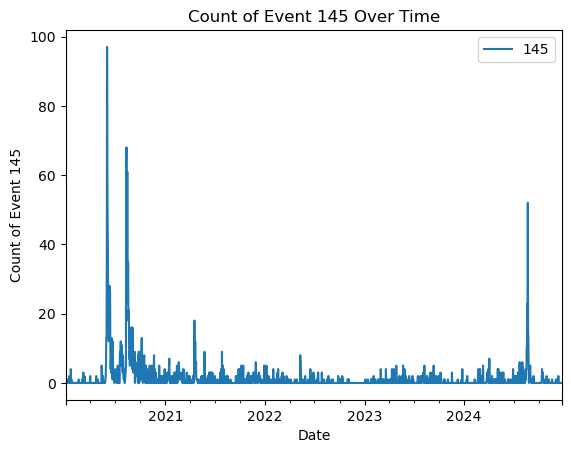

In [ ]:
import matplotlib.pyplot as plt

Y.plot(x='Date', y=145, kind='line', title='Count of Event 145 Over Time') 
#TODO the documentation says that event codes should be type str, but it's type int rn - I have no qualms but it's bad form
plt.xlabel('Date')
plt.ylabel('Count of Event 145')
plt.show()

---

The idea is that these would be unsafe days in the City, and that the training set should learn what those look like, and the testing set should be able to predict them.

---

In [70]:
# Calculate the split index
split_index = len(X) // 2

# Split X into test and train sets
X_test = X[:split_index]
X_train = X[split_index:]

# Split Y into test and train sets
Y_test = Y[:split_index]
Y_train = Y[split_index:]

# Display the shapes to verify
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of Y_test: {Y_test.shape}")
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of Y_train: {Y_train.shape}")

Shape of X_test: torch.Size([906, 7, 25])
Shape of Y_test: (906, 1)
Shape of X_train: torch.Size([906, 7, 25])
Shape of Y_train: (906, 1)


---

# Creating the Model

---

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Define the LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(X.shape[1], X.shape[2])))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Display the model summary
model.summary()

# Train the model
history = model.fit(X_train, Y_train[145].values, epochs=50, batch_size=32, validation_data=(X_test, Y_test[145].values))

# Plot the training and validation loss
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# Initialize the model, loss function, and optimizer
input_size = X.shape[2]
hidden_size = 50
num_layers = 2
output_size = 1

model = LSTMModel(input_size, hidden_size, num_layers, output_size)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Convert Y_train to tensor
Y_train_tensor = torch.tensor(Y_train[145].values, dtype=torch.float32).view(-1, 1)

# Train the model
num_epochs = 100
for epoch in range(num_epochs):
    model.train()
    outputs = model(X_train)
    optimizer.zero_grad()
    loss = criterion(outputs, Y_train_tensor)
    loss.backward()
    optimizer.step()
    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Evaluate the model
model.eval()
with torch.no_grad():
    Y_test_tensor = torch.tensor(Y_test[145].values, dtype=torch.float32).view(-1, 1)
    predicted = model(X_test)
    test_loss = criterion(predicted, Y_test_tensor)
    print(f'Test Loss: {test_loss.item():.4f}')


---

# Model 1 Predictions & Results

---

---

## Model 1 Analysis

Error rate?
Overfitting?

---

---

## Model Prunning

Which event codes were associated with 145 events and which ones were not?

---